The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Started on: 2020-03-30 13:23:51


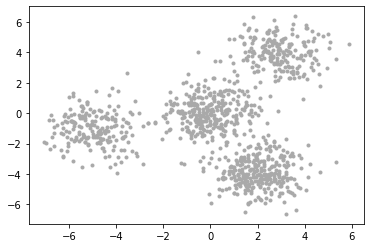

In [50]:
%load_ext autoreload
%autoreload 2

import time, datetime
import scipy.io
import matplotlib.pyplot as plt
from image_search import *
import numpy as np

num_clusters = 4
num_visual_words = 10000

print("Started on: {}".format(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")))

data = scipy.io.loadmat('data2d.mat')['data'].T

def plot_data(data):
    plt.scatter(data[:, 0], data[:, 1], color='darkgrey', marker='.')

plot_data(data)

[[ 2.01651379 -3.89961585]
 [-0.02765316  0.05197939]
 [-4.93744921 -1.04516013]
 [ 2.90934205  3.97108298]] (4, 2)
1244.6696109096708
K-Means computed in: 0.008s


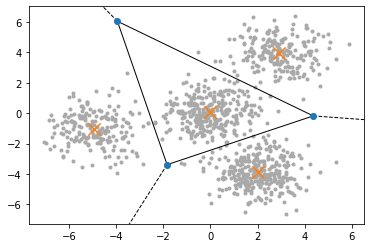

In [51]:
t = time.time()
means, distance_sum = kmeans(num_clusters, data)
print(means, means.shape)
print(distance_sum)
print("K-Means computed in: {:.3f}s".format(time.time() - t))

plt.figure()
plot_data(data)
plt.scatter(means[:, 0], means[:, 1], color='tab:orange', marker='x', s=150)
ax = plt.gca()

def plot_voronoi(ax):
    old_xlim = ax.get_xlim()
    old_ylim = ax.get_ylim()
    from scipy.spatial import Voronoi, voronoi_plot_2d
    vor = Voronoi(means)
    voronoi_plot_2d(vor, ax, show_points=False)
    ax.set_xlim(old_xlim)
    ax.set_ylim(old_ylim)

plot_voronoi(ax)

Nearest mean search done in 1.59e+09s


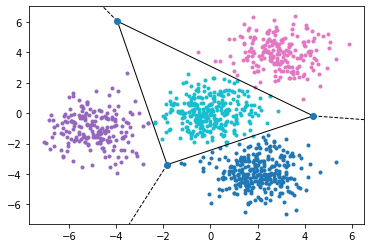

In [52]:
t = time.time()
labels, distances = nearest(means, data)
print("Nearest mean search done in {:.3}s".format(time.time()))

for label, color in zip(range(num_clusters), ['tab:blue', 'tab:cyan', 'tab:purple', 'tab:pink']):
    plt.scatter(data[labels==label, 0], data[labels==label, 1], c=color, marker='.')

plot_voronoi(plt.gca())
 

In [53]:

hessian_centers10k = scipy.io.loadmat('hess_centers10k.mat')['CX'].T
realdata = scipy.io.loadmat('realdata.mat') 
data = realdata['data'][0]  
labels = np.array([x[0] for x in realdata['lbls'][0]])

In [54]:
t = time.time()
db = create_db(labels, num_visual_words)
print("DB created in {:.3}s".format(time.time()-t))

# print('Lenghts of #2: {}, #18: {}, #30: %f\n', full([sum(DB(2,:).^2), sum(DB(18,:).^2), sum(DB(30,:).^2)]));
print('Lenghts of #2: {:.2f}, #18: {:.2f}, #30: {:.2f}'.format(
    (db[:, 1].toarray()**2).sum(), (db[:,17].toarray()**2).sum(), (db[:, 29].toarray()**2).sum())
)
second_img = db[:, 1].toarray()
weights = second_img[second_img > 0]
print('First 10 weights of the 2nd image {}'.format(weights[:10]))

# Expected results:
# Lenghts of #2: 1.00, #18: 1.00, #30: 1.00
# First 10 weights of the 2nd image [0.01720561 0.01720561 0.03441123 0.03441123 0.01720561 0.03441123
#  0.03441123 0.03441123 0.01720561 0.03441123]


DB created in 0.14s
Lenghts of #2: 1.00, #18: 1.00, #30: 1.00
First 10 weights of the 2nd image [0.01720561 0.01720561 0.03441123 0.03441123 0.01720561 0.03441123
 0.03441123 0.03441123 0.01720561 0.03441123]


In [55]:
idf = np.ones((num_visual_words, ))
for im_id in [1, 17, 29]:
    t = time.time()
    idxs, scores = query(db, labels[im_id], idf)
    print("query done in {:.3f}s".format(time.time()-t))
    print("Ordering with query #{}: {} ...".format(im_id, idxs[:10]))
    print("Scores with query #{}: {} ...".format(im_id, scores[:10]))

# Expected results:
# Ordering with query #1: [ 1  3  2  4  0  6 38 18 15  8] ...
# Scores with query #1: [1.27376544 0.52802771 0.46172683 0.40904856 0.38273499 0.33701545
#  0.33179742 0.30495137 0.29066423 0.27162326] ...
# query done in 0.007s
# Ordering with query #17: [17 19 15 16 18 21 36 38 35 23] ...
# Scores with query #17: [1.39304095 0.68088916 0.67960761 0.66109735 0.56492229 0.41925893
#  0.3994056  0.39312639 0.38879121 0.38502677] ...
# query done in 0.002s
# Ordering with query #29: [29 25 28 26 27 30 32 12 10  8] ...
# Scores with query #29: [2.10162376 1.63122258 1.6107387  1.60938793 1.55774262 0.49813127
#  0.4385539  0.36742737 0.3476558  0.27872021] ...

query done in 0.005s
Ordering with query #1: [ 1  3  2  4  0  6 38 18 15  8] ...
Scores with query #1: [1.27376544 0.52802771 0.46172683 0.40904856 0.38273499 0.33701545
 0.33179742 0.30495137 0.29066423 0.27162326] ...
query done in 0.007s
Ordering with query #17: [17 19 15 16 18 21 36 38 35 23] ...
Scores with query #17: [1.39304095 0.68088916 0.67960761 0.66109735 0.56492229 0.41925893
 0.3994056  0.39312639 0.38879121 0.38502677] ...
query done in 0.002s
Ordering with query #29: [29 25 28 26 27 30 32 12 10  8] ...
Scores with query #29: [2.10162376 1.63122258 1.6107387  1.60938793 1.55774262 0.49813127
 0.4385539  0.36742737 0.3476558  0.27872021] ...


In [59]:
idf = get_idf(labels, num_visual_words)

print('IDF weights of first 10 visual words: {}'.format(idf[:10]))
 
t = time.time()
db=create_db_tfidf(labels, num_visual_words, idf)
print ('Tfidf db created in {:.3}s'.format(time.time()-t))

print('Lenghts of #2: {:.2f}, #18: {:.2f}, #30: {:.2f}'.format(
    (db[:, 1].toarray()**2).sum(), (db[:,17].toarray()**2).sum(), (db[:, 29].toarray()**2).sum())
)

second_img = db[:, 1].toarray()
weights = second_img[second_img > 0]
print('First 10 weights of the 2nd image {}'.format(weights[:10]))

# Expected results:
# IDF weights of first 10 visual words: [[0.        ]
#  [1.49165488]
#  [2.59026717]
#  [1.49165488]
#  [2.59026717]
#  [2.30258509]
#  [2.59026717]
#  [1.74296931]
#  [1.89711998]
#  [1.49165488]]
# Tfidf db created in 0.0898s
# Lenghts of #2: 2.38, #18: 1.83, #30: 2.20
# First 10 weights of the 2nd image [0.03264111 0.02998886 0.03867581 0.05997771 0.02566484 0.05997771
#  0.06528223 0.03375154 0.02998886 0.05132968]


IDF weights of first 10 visual words: [[0.        ]
 [1.49165488]
 [2.59026717]
 [1.49165488]
 [2.59026717]
 [2.30258509]
 [2.59026717]
 [1.74296931]
 [1.89711998]
 [1.49165488]]
Tfidf db created in 0.1s
Lenghts of #2: 2.38, #18: 1.83, #30: 2.20
First 10 weights of the 2nd image [0.03264111 0.02998886 0.03867581 0.05997771 0.02566484 0.05997771
 0.06528223 0.03375154 0.02998886 0.05132968]


In [57]:
for im_id in [1, 17, 29]:
    idf = np.ones((num_visual_words, ))
    t = time.time()
    idxs, scores = query(db, labels[im_id], idf)
    print("query done in {:.3f}s".format(time.time()-t))
    print("Ordering with query #{}: {} ...".format(im_id, idxs[:10]))
    print("Scores with query #{}: {} ...".format(im_id, scores[:10]))


# Expected results:
# Ordering with query #1: [ 1  3  2  4  0 38 18  6 15 16] ...
# Scores with query #1: [1.86384425 0.73507323 0.60909155 0.53208607 0.48905146 0.40485071
#  0.40120768 0.38893817 0.3802747  0.34839662] ...
# query done in 0.004s
# Ordering with query #17: [17 15 16 19 18 21 36 23 38 35] ...
# Scores with query #17: [1.78793393 0.82735267 0.79641385 0.7820111  0.69018981 0.47755897
#  0.46806813 0.44974778 0.44740665 0.4404922 ] ...
# query done in 0.002s
# Ordering with query #29: [29 26 25 28 27 30 32 12 10 33] ...
# Scores with query #29: [3.02196469 2.28403288 2.27227205 2.22677334 2.14190393 0.61222181
#  0.52785324 0.43436869 0.39584066 0.31937223] ...

query done in 0.001s
Ordering with query #1: [ 0 22 23 24 25 26 27 28 21 29] ...
Scores with query #1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] ...
query done in 0.003s
Ordering with query #17: [ 0 22 23 24 25 26 27 28 21 29] ...
Scores with query #17: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] ...
query done in 0.001s
Ordering with query #29: [ 0 22 23 24 25 26 27 28 21 29] ...
Scores with query #29: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] ...
